In [1]:
#Name: Supreeth Hassan Ravindra
#CWID: 20020533
#HW-09:9.1 Cluster 

In [2]:
#Importing the required libraries
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
df = pd.read_csv("wisc_bc_ContinuousVar.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#checking for null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
# Removing rows with missing values
df = df.dropna()

In [7]:
# Extract features (excluding the diagnosis column)
features = df.drop("diagnosis", axis=1)

In [8]:
#Perform scaling
data_scaled = StandardScaler()
features = data_scaled.fit_transform(features)

In [9]:
# Perform hierarchical clustering
linkage_matrix = linkage(features, method='ward')

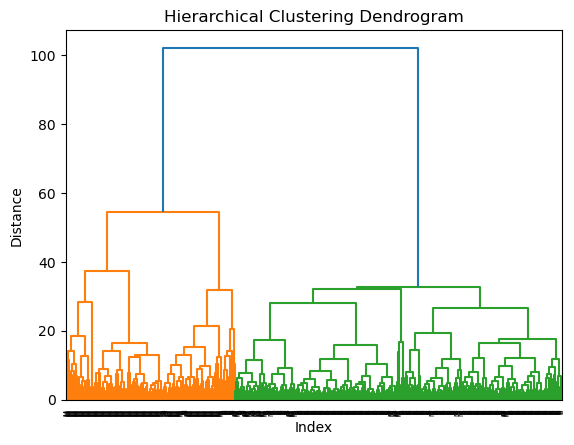

In [10]:
# Plotting the dendrogram
dendrogram(linkage_matrix, labels=df["diagnosis"].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

In [11]:
# Cutting the dendrogram to obtain clusters (2 clusters in this case)
num_clusters = 2
clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

In [12]:
# Adding the cluster information to the original dataset
df['cluster'] = clusters

In [13]:
# Tabulate the clustered rows against the diagnosis column
table_result = pd.crosstab(df['cluster'], df['diagnosis'])
table_result

diagnosis,B,M
cluster,,
1,333,42
2,24,170
